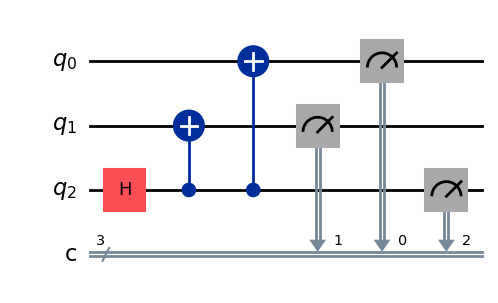

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi


qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[0])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw(output='mpl')

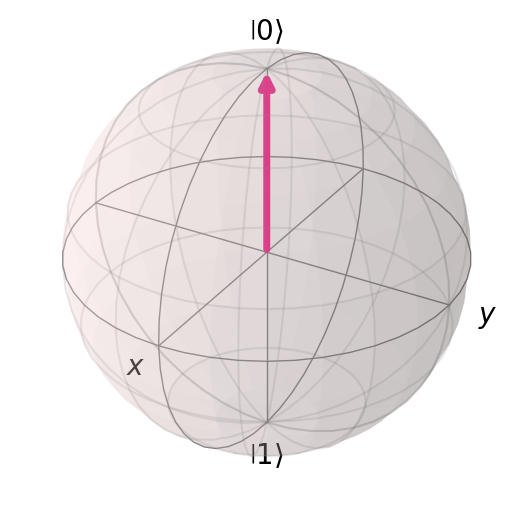

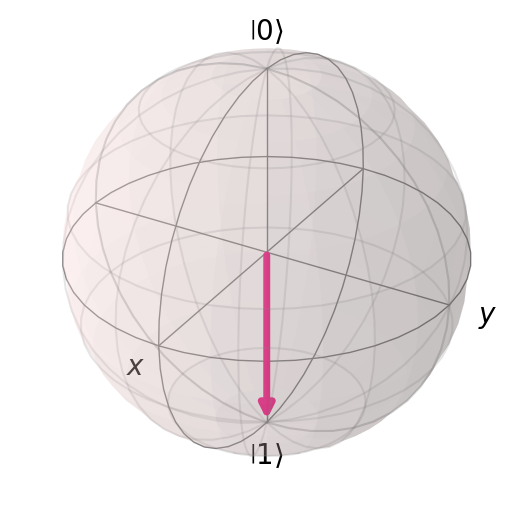

In [22]:
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt

bloch0 = Bloch()
bloch0.add_vectors([0, 0, 1])
bloch0.save('../img/bloch_state_0.png')

bloch1 = Bloch()
bloch1.add_vectors([0, 0, -1])
bloch1.save('../img/bloch_state_1.png')

bloch0.show()
bloch1.show()

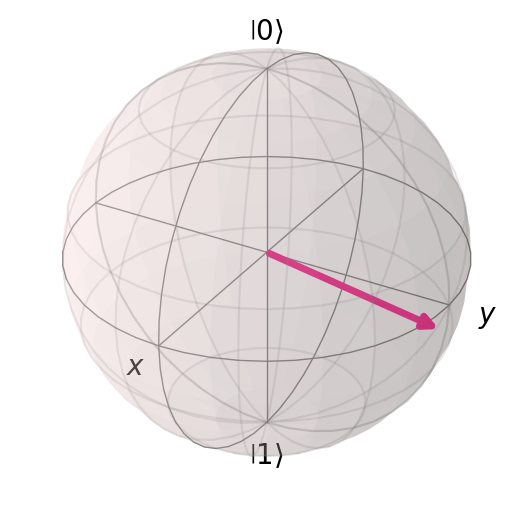

In [3]:
from qiskit.visualization.bloch import Bloch
import numpy as np
from qiskit.quantum_info import Statevector

# Definir el estado
alpha = (1 + 1j * np.sqrt(3)) / 3
beta = (2 - 1j) / 3
psi = Statevector([alpha, beta])

# Calcular las coordenadas de Bloch (X, Y, Z)
x = 2 * np.real(np.conj(alpha) * beta)
y = 2 * np.imag(np.conj(beta) * alpha)
z = np.abs(alpha)**2 - np.abs(beta)**2

# Crear la esfera de Bloch y agregar el vector
b = Bloch()
b.add_vectors([x, y, z])
b.show()
b.save('../img/bloch_measurement_example')


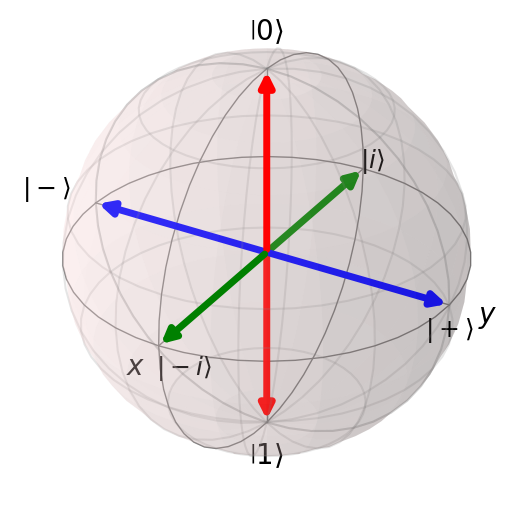

In [57]:
from qiskit.visualization.bloch import Bloch
import numpy as np
import matplotlib.pyplot as plt

# Crear esfera de Bloch
b = Bloch()

# Ocultar etiquetas de ejes antes de renderizar
b.axes_labels = ['', '', '']

# Vectores de los estados base
bloch_vectors = [
    (0, 0, 1),    # |0⟩
    (0, 0, -1),   # |1⟩
    (1, 0, 0),    # |+⟩
    (-1, 0, 0),   # |-⟩
    (0, 1, 0),    # |i⟩
    (0, -1, 0),   # |-i⟩
]

# Colores personalizados
b.vector_color = ['r', 'r', 'g', 'g', 'b', 'b']

# Añadir vectores
for vec in bloch_vectors:
    b.add_vectors(vec)

# Renderizar esfera (crea ax)
b.render()

# Eliminar etiquetas numéricas en los ejes (ticks)
b.axes.set_xticks([])
b.axes.set_yticks([])
b.axes.set_zticks([])

# Eliminar los textos que aparecen por defecto (X, Y, Z)
for label in b.axes.get_xticklabels() + b.axes.get_yticklabels() + b.axes.get_zticklabels():
    label.set_visible(False)

# Añadir nuestras propias etiquetas
labels = {
    (1.1, -0.2, 0): r'$|+\rangle$',
    (-1.3, 0, 0): r'$|-\rangle$',
    (0, 1.1, 0): r'$|i \rangle$',
    (0.2, -1.1, 0): r'$|-i \rangle$',
}

for pos, label in labels.items():
    b.axes.text(*pos, label, fontsize=18, ha='center', va='center')



# Mostrar
plt.show()

b.fig.savefig('../img/bloch_other_bases.png', dpi=300, bbox_inches='tight')